# **LeNet-5**

## Define Model

## input &rarr; C1 &rarr; TANH &rarr; S2 &rarr; C3 &rarr; TANH &rarr; S4 &rarr; C5 &rarr; TANH &rarr; FC6 &rarr; SOFTMAX7

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

# Convolution 1
model.add(Conv2D(filters = 6, kernel_size=5, strides=1, activation='tanh',\
                    input_shape=(28,28,1), padding='same'))

# Subsampling 2
model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))

# Convolution 3
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'))

# Subsampling 4
model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))

# Convolution 5
model.add(Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', padding='valid'))

model.add(Flatten())

# Fully Connected 6
model.add(Dense(units=84, activation='tanh'))

# Softmax 7
model.add(Dense(units=10, activation='softmax'))

model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                        

2022-08-04 19:51:08.294294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-04 19:51:08.294395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Tuning Hyperparameter

In [2]:
def lr_schedule(epoch):
    if epoch <= 2:
        lr = 5e-4
    elif epoch > 2 and epoch <= 5 :
        lr = 2e-4
    elif epoch > 5 and epoch <= 8 :
        lr = 1e-4
    elif epoch > 8 and epoch <= 12 :
        lr = 5e-5
    else:
        lr = 1e-5
        
    return lr

In [3]:
from gc import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

lr_scheduler = LearningRateScheduler(lr_schedule)
checkpoint = ModelCheckpoint(filepath='model_LeNet_sgd_without_normalized.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

callbacks = [checkpoint, lr_scheduler]


## Load Data

In [4]:
from keras.datasets import mnist
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


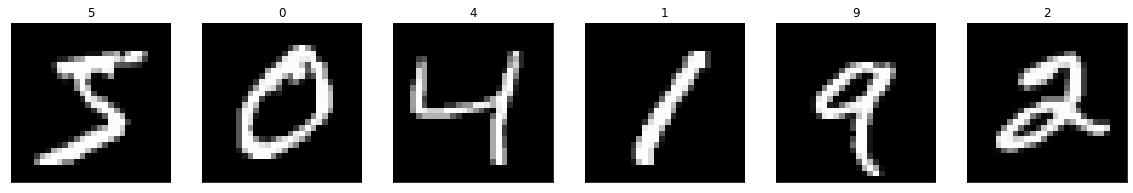

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

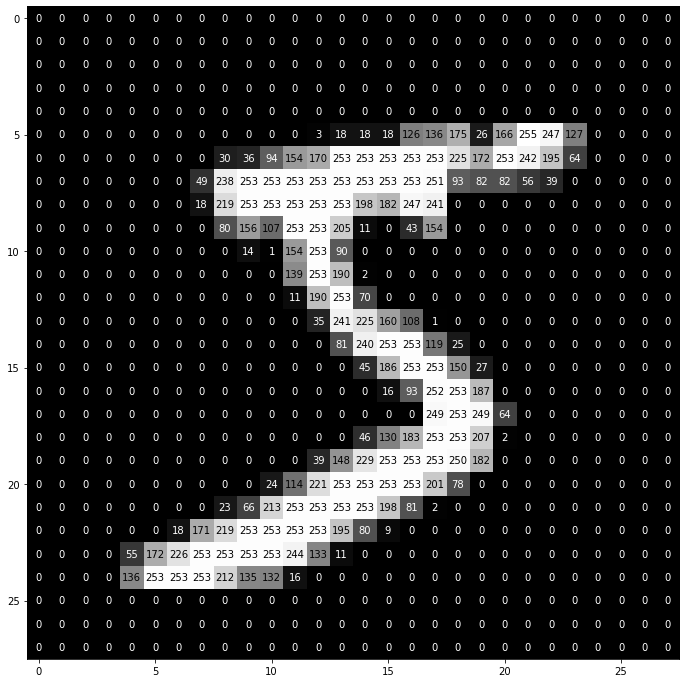

In [6]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [7]:
# normalize the data to accelerate learning
# train_mean = np.mean(X_train)
# train_std = np.std(X_train)
# test_mean = np.mean(X_test)
# test_std = np.std(X_test)
# print(train_mean, train_std)
# X_train = (X_train-train_mean)/(train_std+1e-7)
# X_test = (X_test-test_mean)/(test_std+1e-7)
print(np.max(X_train), np.min(X_train))

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

255 0
X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [8]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]


In [9]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

image input shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [10]:
# the loss function is categorical cross entropy since we have multiple classes (10) 


# compile the model by defining the loss function, optimizer, and performance metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=20,
          validation_data=(X_test, y_test), callbacks=callbacks, 
          verbose=2, shuffle=True)

Epoch 1/20


2022-08-04 19:51:14.186910: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-04 19:51:14.406457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-04 19:51:41.567909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.06576, saving model to model_LeNet_sgd_without_normalized.weights.best.hdf5
3750/3750 - 31s - loss: 0.1459 - accuracy: 0.9579 - val_loss: 0.0658 - val_accuracy: 0.9781 - lr: 5.0000e-04 - 31s/epoch - 8ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.06576 to 0.06078, saving model to model_LeNet_sgd_without_normalized.weights.best.hdf5
3750/3750 - 30s - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.0608 - val_accuracy: 0.9793 - lr: 5.0000e-04 - 30s/epoch - 8ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.06078 to 0.04667, saving model to model_LeNet_sgd_without_normalized.weights.best.hdf5
3750/3750 - 30s - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0467 - val_accuracy: 0.9850 - lr: 5.0000e-04 - 30s/epoch - 8ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.04667 to 0.03888, saving model to model_LeNet_sgd_without_normalized.weights.best.hdf5
3750/3750 - 29s - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.0389 - val_accuracy: 0.

In [12]:
# load the weights that yielded the best validation accuracy
model.load_weights('model_LeNet_sgd_without_normalized.weights.best.hdf5')

In [13]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print(score[0])

2022-08-04 20:01:22.340934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test accuracy: 98.9200%
0.031951528042554855


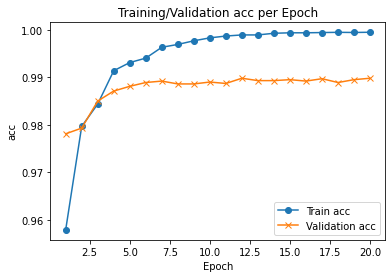

In [14]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

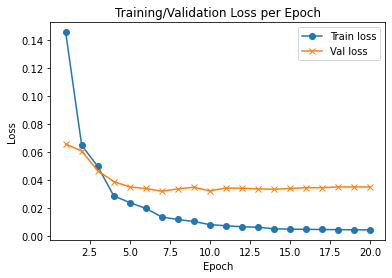

In [15]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

In [17]:
import tensorflow as tf
def numerical_difference(x):
    temp = x - 1
    return tf.keras.activations.tanh(x)-tf.keras.activations.tanh(temp)

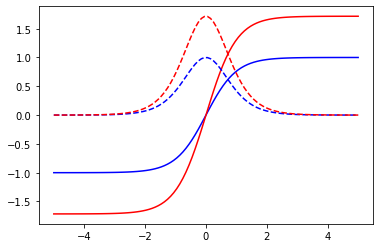

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

X = np.linspace(-5.0,5.0,100)
Y = tf.keras.activations.tanh(X)
scaled_Y = 1.7159*Y
plt.plot(X,Y,'-b')
plt.plot(X,scaled_Y,'-r')
plt.plot(X,1-Y**2,'--b')
plt.plot(X,(1-Y**2)*1.7159,'--r')
plt.show()